$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

 1. $\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



Write your answer here: 

$f(x_1,x_2)=\begin{bmatrix} 
	x_1 & x_2 \\
	\end{bmatrix}
\begin{bmatrix} 
	1 & 0  \\
	0 & 1 \\
	\end{bmatrix}
  \begin{bmatrix} 
	x_1 \\
	x_2 \\
	\end{bmatrix}
  + 2*
  \begin{bmatrix} 
	100 & -25 \\
	\end{bmatrix}
  \begin{bmatrix} 
	x_1 \\
	x_2 \\
	\end{bmatrix}
  +10625$

$x  = 
\begin{bmatrix} 
	x_1 \\ x_2 \\
	\end{bmatrix}$

$A = 
\begin{bmatrix} 
	1 & 0  \\
	0 & 1 \\
	\end{bmatrix}
$

$b = \begin{bmatrix} 
	100 \\ -25 \\
	\end{bmatrix}
$




2. 
$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

Write your answer here:
 Given that $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$ \\
we can find $\nabla f(\mathbf{x}) = 2\mathbf{A} \mathbf{x}+2 \mathbf{b} ->(1) $ \\
Since we are to minimize  $g(\alpha) =f(\mathbf{x} - \alpha \nabla f(\mathbf{x})) \   \text{with respect to } \alpha .  \\
\text{As we need to minimize ,derivate it with respect to alpha} \ g(\alpha) so 
\\ \frac{δg}{δα} = [\nabla f(x-\alpha\nabla f(\mathbf{x}))]^\top[-\nabla f(\mathbf{x})]   \\
\text{By Fermat's theorem the necessary condition for optimality is:} \\
 \frac{δg}{δα}=0
 ⇒ \  [\nabla f(x-\alpha\nabla f(\mathbf{x}))]^\top[-\nabla f(\mathbf{x})]=0 \\ 
⇒ [-\nabla f(\mathbf{x})]^\top[\nabla f(x-\alpha\nabla f(\mathbf{x}))]=0  \ \ (\text{Took transpose on both sides} )\\
 ⇒[-\nabla f(\mathbf{x})]^\top[2\mathbf{A}(\mathbf{x-α\nabla}f(\mathbf{x}))+2b]=0 \ \  \text{By Equation (1)}  \\ ⇒α= \frac{[\nabla f(\mathbf{x})]^⊤[\mathbf{A}\mathbf{x}+\mathbf{b}]}{[\nabla f(\mathbf{x})]^⊤\mathbf{A}\nabla f(\mathbf{x})} \\
 ⇒ α = \frac{[\nabla f(\mathbf{x})]^⊤\nabla f(\mathbf{x})}{\mathbf{2}[\nabla f(\mathbf{x})]^⊤\mathbf{A} \nabla f(\mathbf{x})} $


 ⇒ α = 0.5 as A is identity in the given problem

We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [27]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
import matplotlib.pyplot as plt
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [14]:
#Complete the module to compute the steplength
def compute_steplength(x): #add appropriate arguments to the function 
  a = np.dot(evalg(x).T,evalg(x))
  b = 2*np.dot(np.dot(evalg(x).T,np.identity(2)),evalg(x))# Here A is identity
  step_length = a/b
  return step_length

In [23]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k

In [20]:
my_start_x = np.array([10,10])
my_tol= 1e-3
find_minimizer(my_start_x, my_tol)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0


(array([-100.,   25.]), 1)

4.[R] With starting point $x_0$ = (10, 10) and the new module to compute $η^k$, try τ = $10^{-p}$ where p = 1, 2, . . . , 10.
For each τ , record the number of iterations taken by the algorithm to terminate. Prepare a plot where the
number of iterations is plotted against τ values. Compare and contrast the plot with the plots obtained in
Exercise 1 with fixed step length values.

In [26]:
iter_array = []
t_val_array = []
for p in range(1,11):
  t_val = (10)**(-p)
  t_val_array.append(t_val)
  start_x = np.array([10,10])
  x,k = find_minimizer(start_x,t_val)
  iter_array.append(k)
  print(f'* No of iterations : {k}, minimizer : {x}  f(x) : {evalf(x)}')

* No of iterations : 1, minimizer : [-100.   25.]  f(x) : 0.0
* No of iterations : 1, minimizer : [-100.   25.]  f(x) : 0.0
* No of iterations : 1, minimizer : [-100.   25.]  f(x) : 0.0
* No of iterations : 1, minimizer : [-100.   25.]  f(x) : 0.0
* No of iterations : 1, minimizer : [-100.   25.]  f(x) : 0.0
* No of iterations : 1, minimizer : [-100.   25.]  f(x) : 0.0
* No of iterations : 1, minimizer : [-100.   25.]  f(x) : 0.0
* No of iterations : 1, minimizer : [-100.   25.]  f(x) : 0.0
* No of iterations : 1, minimizer : [-100.   25.]  f(x) : 0.0
* No of iterations : 1, minimizer : [-100.   25.]  f(x) : 0.0


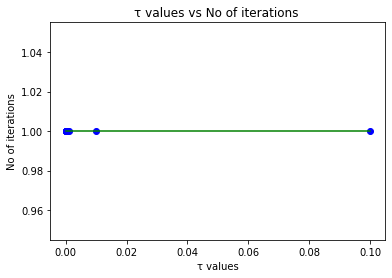

In [30]:
plt.plot(t_val_array,iter_array,color = 'g')
plt.scatter(t_val_array,iter_array,color = 'b')
plt.title("τ values vs No of iterations ")
plt.xlabel("τ values")
plt.ylabel("No of iterations");

Observation : From the graph we can infer that no of iterations does not depend on the τ values .Looking at the graph in Exercise 1 we can see the dependency between the τ values and no of iterations, as no of iterations decreases with increase in τ values . So we can conclude that gradient descent with line search is better than vanilla gradient descent